In [1]:
import os
import numpy as np

from neuron import rxd
from neuron import h

from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import plotly

import sys
sys.path.insert(1, "../utils/")
import Stimuli, Pyr

## load seg locs

In [137]:
seg_locIDs = ['ID2','ID19','ID48','ID90','ID84','ID81','ID55','ID96','ID22','ID70',
              'ID21','ID36','ID25','ID50','ID99','ID88','ID92','ID69','ID87','ID71']
seg_loc_files = []
seg_loc_firing_rates = {}
for file in os.listdir('../data/morpho/segment_arrays/'):
    seg_locID = file.split('_')[3].strip('.npy')
    if seg_locID in seg_locIDs:
        seg_loc_files.append(file)
        seg_loc_firing_rates[seg_locID] = float(file.split('_')[2].strip('Hz'))

In [144]:
seg_loc_firing_rates

{'ID71': 7.9,
 'ID96': 12.6,
 'ID25': 2.7,
 'ID2': 8.2,
 'ID55': 12.1,
 'ID87': 6.3,
 'ID22': 13.2,
 'ID19': 8.8,
 'ID99': 3.9,
 'ID84': 10.8,
 'ID69': 5.5,
 'ID92': 4.7,
 'ID70': 13.4,
 'ID88': 4.2,
 'ID36': 2.2,
 'ID81': 11.0,
 'ID90': 10.0,
 'ID50': 3.1,
 'ID48': 9.3,
 'ID21': 1.6}

In [3]:
x = {'ID71': 7.9,
 'ID96': 12.6,
 'ID25': 2.7,
 'ID2': 8.2,
 'ID55': 12.1,
 'ID87': 6.3,
 'ID22': 13.2,
 'ID19': 8.8,
 'ID99': 3.9,
 'ID84': 10.8,
 'ID69': 5.5,
 'ID92': 4.7,
 'ID70': 13.4,
 'ID88': 4.2,
 'ID36': 2.2,
 'ID81': 11.0,
 'ID90': 10.0,
 'ID50': 3.1,
 'ID48': 9.3,
 'ID21': 1.6}
sorted(list(x.values()))

[1.6,
 2.2,
 2.7,
 3.1,
 3.9,
 4.2,
 4.7,
 5.5,
 6.3,
 7.9,
 8.2,
 8.8,
 9.3,
 10.0,
 10.8,
 11.0,
 12.1,
 12.6,
 13.2,
 13.4]

In [201]:
c = ListedColormap(["gold", "indigo", "deepskyblue", "darkorange"], N=4)
cmap=LinearSegmentedColormap.from_list("penguin", [c(i) for i in range(4)])

In [167]:
pyr = Pyr.Pyr()
section_locations = []
dist2soma = []
for seg in pyr.all_segs:
    for sec in seg:
        section_locations.append(seg.hname().split('.')[1].split('[')[0])

        dist2soma.append(h.distance(sec, pyr.cell.soma(0.5)))

In [168]:
pyr_color_map = {
    'soma': 0, #'indigo',
    'apic': 1, #'steelblue',
    'basal': 2 #:'red'
    'axon': 3, #'green',
}

all_segs_colors = [pyr_color_map[seg_loc] for seg_loc in section_locations]

In [169]:
cyt = rxd.Region(pyr.all_segs)
error = rxd.Parameter(cyt)

i = 0
for sec in pyr.all_segs:
    for seg in sec:   
        error.nodes(seg).value = all_segs_colors[i]
        i += 1

In [170]:
stim_types = Stimuli.ExperimentalStimParams().stim_scaffold['pyr']['stim_type_array']

stim_type2color = {
    'ex':'red',
    'in':'blue'
}

In [184]:
seg_loc_files[5]

'segment_array_6.3Hz_ID87.npy'

In [233]:
ps = h.PlotShape(False)
ps.variable(error)
ps.scale(0, 3)

ps2 = ps.plot(plotly, cmap=cmap)
ps2.update_layout(scene=dict(
    xaxis=dict(
        showticklabels=False,
        ticks='',
        title=''
    ),
    yaxis=dict(
        showticklabels=False,
        ticks='',
        title=''
    ),
    zaxis=dict(
        showticklabels=False,
        ticks='',
        title=''
    )
))

# draw the input locations
seg_locs = np.load(f'../data/morpho/segment_arrays/{seg_loc_files[5]}')
for stim_type, seg_loc in zip(stim_types, seg_locs):
    seg = pyr.connection_points[seg_loc]
    ps2.mark(seg(.5), marker_size=3, marker_color=stim_type2color[stim_type])
    
# redraw the soma
ps2.mark(pyr.cell.soma(0.5), marker_size=3, marker_color='green')

ps2.show()

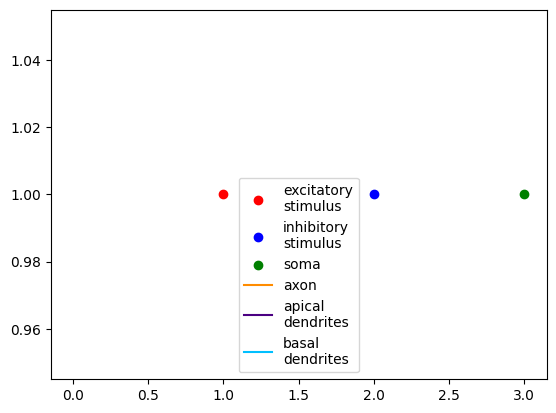

In [229]:
plt.scatter(1,1,c='red')
plt.scatter(2,1,c='blue')
plt.scatter(3,1,c='green')

plt.plot(0,1,c='darkorange')
plt.plot(0,1,c='indigo')
plt.plot(0,1,c='deepskyblue')



plt.legend(['excitatory\nstimulus','inhibitory\nstimulus', 'soma','axon','apical\ndendrites','basal\ndendrites'], ncol=1)
plt.savefig(f'{figures_dir}morpho3D_legend.svg', format='svg')

plt.show()

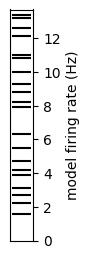

In [226]:
fig, axe = plt.subplots(1,figsize=(.3, 3))
axe.hlines(seg_loc_firing_rates.values(), .1, .9, color='k')

#axe.hlines(seg_loc_firing_rates['ID87'], 0, 1, color='green')

axe.set_xlim(0,1)
axe.set_ylim(0,13.7)
axe.yaxis.tick_right()
axe.yaxis.set_label_position("right")
axe.set_xticks([])
axe.set_ylabel('model firing rate (Hz)')

figures_dir = '../figures/'
plt.savefig(f'{figures_dir}morpho3D_firing_rates.svg', format='svg')
plt.show()

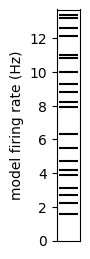

In [230]:
fig, axe = plt.subplots(1,figsize=(.3, 3))
axe.hlines(seg_loc_firing_rates.values(), .1, .9, color='k')

#axe.hlines(seg_loc_firing_rates['ID87'], 0, 1, color='green')

axe.set_xlim(0,1)
axe.set_ylim(0,13.7)
#axe.yaxis.tick_right()
#axe.yaxis.set_label_position("right")
axe.set_xticks([])
axe.set_ylabel('model firing rate (Hz)')

figures_dir = '../figures/'
plt.savefig(f'{figures_dir}morpho3D_firing_rates.svg', format='svg')
plt.show()